In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from Metrics.private_attacks import *
from Notebooks.Generators.Generators_1.sdv_generation_report import *
from Notebooks.Generators.Generators_0.NonParam_DataCopulas_mix.SDG_Copulas_NonParam import plot_comparision
from Notebooks.Generators.Generators_0.NonParam_DataCopulas_mix.SDG_Copulas_NonParam import generate_multivariate_data_mix
from Notebooks.Generators.Generators_0.NonParam_DataCopulas_mix.SDG_Copulas_NonParam import encode_categorical
from Metrics.dd_plot import ddplot
# from Notebooks.Generators.Generators_1.smartonoise_generation import *

## Preprocessing

In [3]:
#Dividing the dataset in original, and control. 
original=pd.read_csv('DataSets/Data_Adult/adult_original.csv')
control=pd.read_csv('DataSets/Data_Adult/adult_control.csv')
aux_cols = [
    ['workclass', 'education', 'hours-per-week', 'capital-loss', 'capital-gain'],
    [ 'race', 'sex', 'fnlwgt', 'age', 'native-country']
]

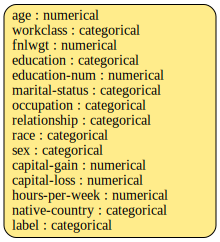

In [4]:
data, metadata = download_demo(
    modality='single_table',
    dataset_name='adult'
)
metadata.visualize()

In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.tolist()
continuous_columns = data.select_dtypes(include=['float64','int64']).columns
continuous_columns = continuous_columns.tolist()

## Generating synthetic data

In [16]:
#Generating data with SDV
FASTML_samples,CTGAN_samples,GaussianCopula_samples,TVAE_samples,CopulaGAN_samples = run_all_models_sdv(original,
                                                                                                    metadata,
                                                                                                    len(original))

#Generating data with SmartNoise. Remeber this function was runned in a different environment, and in google collab
epsilon=3
epsilon_prepro=1
aim_samples,DPCTGAN_samples,PATECTGAN_samples,PACSYNTH_samples,MST_samples = run_all_models_smartnoise(original,
                                                                                            epsilon,
                                                                                            epsilon_prepro,
                                                                                            len(original),
                                                                                            categorical_columns,
                                                                                            continuous_columns)

#Using non_parametric copulas
non_param_Copulas_samples=generate_multivariate_data_mix(original, categorical_columns, continuous_columns, 
                                                         len(original), plotting=False,  bins=20)


#Saving each synthetic data in a csv file
FASTML_samples.to_csv('DataSets/Data_Adult/FASTML_samples.csv')
CTGAN_samples.to_csv('DataSets/Data_Adult/CTGAN_samples.csv')
GaussianCopula_samples.to_csv('DataSets/Data_Adult/GaussianCopula_samples.csv')
TVAE_samples.to_csv('DataSets/Data_Adult/TVAE_samples.csv')
CopulaGAN_samples.to_csv('DataSets/Data_Adult/CopulaGAN_samples.csv')
aim_samples.to_csv('DataSets/Data_Adult/aim_samples_epsilon3.csv')
DPCTGAN_samples.to_csv('DataSets/Data_Adult/DPCTGAN_samples_epsilon3.csv')
PATECTGAN_samples.to_csv('DataSets/Data_Adult/PATECTGAN_samples_epsilon3.csv')
PACSYNTH_samples.to_csv('DataSets/Data_Adult/PACSYNTH_samples_epsilon3.csv')
MST_samples.to_csv('DataSets/Data_Adult/MST_samples_epsilon3.csv')
non_param_Copulas_samples.to_csv('DataSets/Data_Adult/non_param_Copulas_samples.csv')

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 161.21it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 105/105 [00:07<00:00, 13.42it/s]

Overall Score: 62.77%

Properties:
- Column Shapes: 83.8%
- Column Pair Trends: 41.74%


Gen. (-0.84) | Discrim. (0.08): 100%|██████████| 10/10 [02:22<00:00, 14.20s/it]


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 169.69it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 105/105 [00:07<00:00, 13.69it/s]

Overall Score: 62.36%

Properties:
- Column Shapes: 83.17%
- Column Pair Trends: 41.55%


## Metrics

### Privacy attacks metrics

In [6]:
#Reading data 
FASTML_samples=pd.read_csv('DataSets/Data_Adult/FASTML_samples.csv')
CTGAN_samples=pd.read_csv('DataSets/Data_Adult/CTGAN_samples.csv')
GaussianCopula_samples=pd.read_csv('DataSets/Data_Adult/GaussianCopula_samples.csv')
TVAE_samples=pd.read_csv('DataSets/Data_Adult/TVAE_samples.csv')
CopulaGAN_samples=pd.read_csv('DataSets/Data_Adult/CopulaGAN_samples.csv')
aim_samples=pd.read_csv('DataSets/Data_Adult/aim_samples_epsilon3.csv')
DPCTGAN_samples=pd.read_csv('DataSets/Data_Adult/DPCTGAN_samples_epsilon3.csv')
PATECTGAN_samples=pd.read_csv('DataSets/Data_Adult/PATECTGAN_samples_epsilon3.csv')
PACSYNTH_samples=pd.read_csv('DataSets/Data_Adult/PACSYNTH_samples_epsilon3.csv')
MST_samples=pd.read_csv('DataSets/Data_Adult/MST_samples_epsilon3.csv')
non_param_Copulas_samples=pd.read_csv('DataSets/Data_Adult/non_param_Copulas_samples.csv')

In [7]:
#Running every attack in every synthetic data method
#FastML
attack_rate_FASTML, inference_risk_FASTML=run_all_attacks(original, FASTML_samples, control, 500, aux_cols,"FASTML")
#CTGAN
attack_rate_CTGAN, inference_risk_CTGAN=run_all_attacks(original, CTGAN_samples, control, 500, aux_cols,"CTGAN")
#GaussianCopula
attack_rate_GaussianCopula, inference_risk_GaussianCopula=run_all_attacks(original, GaussianCopula_samples, control, 500, aux_cols,"GaussianCopula")
#TVAE
attack_rate_TVAE, inference_risk_TVAE=run_all_attacks(original, TVAE_samples, control, 500, aux_cols,"TVAE")
#CopulaGAN
attack_rate_CopulaGAN, inference_risk_CopulaGAN=run_all_attacks(original, CopulaGAN_samples, control, 500, aux_cols,"CopulaGAN")
#aim
attack_rate_aim, inference_risk_aim=run_all_attacks(original, aim_samples, control, 500, aux_cols,"AIM")
#DPCTGAN
attack_rate_DPCTGAN, inference_risk_DPCTGAN=run_all_attacks(original, DPCTGAN_samples, control, 500, aux_cols,"DPCTGAN")
#PATECTGAN
attack_rate_PATECTGAN, inference_risk_PATECTGAN=run_all_attacks(original, PATECTGAN_samples, control, 500, aux_cols,"PATECTGAN")
#PACSYNTH
attack_rate_PACSYNTH, inference_risk_PACSYNTH=run_all_attacks(original, PACSYNTH_samples, control, 500, aux_cols,"PACSYNTH")
#MST
attack_rate_MST, inference_risk_MST=run_all_attacks(original, MST_samples, control, 500, aux_cols,"MST")
#non_param_Copulas
attack_rate_non_param_Copulas, inference_risk_non_param_Copulas=run_all_attacks(original, non_param_Copulas_samples, control, 500, aux_cols,"non_param_Copulas")

#Concatenating
attack_rates=pd.concat([attack_rate_FASTML,attack_rate_CTGAN,attack_rate_GaussianCopula,attack_rate_TVAE,attack_rate_CopulaGAN,attack_rate_aim,attack_rate_DPCTGAN,attack_rate_PATECTGAN,attack_rate_PACSYNTH,attack_rate_MST,attack_rate_non_param_Copulas],keys=['FASTML','CTGAN','GaussianCopula','TVAE','CopulaGAN','aim','DPCTGAN','PATECTGAN','PACSYNTH','MST','non_param_Copulas'])

#Concatening the "Risk" columns in the inference_risk, using the secret columns as index
secret_columns=inference_risk_FASTML['Secret']
inference_risk_rates=pd.concat([inference_risk_FASTML['Risk'],inference_risk_CTGAN['Risk'],inference_risk_GaussianCopula['Risk'],inference_risk_TVAE['Risk'],inference_risk_CopulaGAN['Risk'],inference_risk_aim["Risk"],inference_risk_DPCTGAN["Risk"],inference_risk_PATECTGAN["Risk"],inference_risk_PACSYNTH["Risk"],inference_risk_MST["Risk"],inference_risk_non_param_Copulas["Risk"]],axis=1)
#Setting the columns names as the method names
inference_risk_rates.columns=['Secret','FASTML','CTGAN','GaussianCopula','TVAE','CopulaGAN','AIM','DPCTGAN','PATECTGAN','PACSYNTH','MST','non_param_Copulas']
#Setting the secret columns as index
inference_risk_rates.index=secret_columns


# #Saving
attack_rates.to_csv('DataSets/Data_Adult/Metrics_results/attack_rates.csv')
inference_risk_rates.to_csv('DataSets/Data_Adult/Metrics_results/inference_risk_rates.csv')


Found 232 failed queries out of 500. Check DEBUG messages for more details.


Singling out evaluation failed with Optimal parameters not found: The maximum number of function evaluations is exceeded.. Please re-run this cell.For more stable results increase `n_attacks`. Note that this will make the evaluation slower.


Found 425 failed queries out of 500. Check DEBUG messages for more details.
Found 202 failed queries out of 500. Check DEBUG messages for more details.


Singling out evaluation failed with Optimal parameters not found: The maximum number of function evaluations is exceeded.. Please re-run this cell.For more stable results increase `n_attacks`. Note that this will make the evaluation slower.


Found 434 failed queries out of 500. Check DEBUG messages for more details.
Found 236 failed queries out of 500. Check DEBUG messages for more details.
Found 426 failed queries out of 500. Check DEBUG messages for more details.
Found 224 failed queries out of 500. Check DEBUG messages for more details.
Found 431 failed queries out of 500. Check DEBUG messages for more details.
Found 213 failed queries out of 500. Check DEBUG messages for more details.
Found 431 failed queries out of 500. Check DEBUG messages for more details.
Found 218 failed queries out of 500. Check DEBUG messages for more details.
Attack `univariate` could generate only 0 singling out queries out of the requested 500. This can probably lead to an underestimate of the singling out risk.
Found 420 failed queries out of 500. Check DEBUG messages for more details.
Found 208 failed queries out of 500. Check DEBUG messages for more details.
Found 436 failed queries out of 500. Check DEBUG messages for more details.
Found 

### Multivariate evaluation

#### DD-plot (So inneficient)

In [ ]:
X=original.copy()
#Iterate over the different synthetic datasets
Y=FASTML_samples.copy()

#Joining the two datasets
def encode_dataset(data,cat_columns):
    data_encoded=data.copy()
    for col in cat_columns:
        data_encoded[col]=encode_categorical(data_encoded,col)
    return data_encoded

X_encode=encode_dataset(X,categorical_columns)
Y_encode=encode_dataset(Y,categorical_columns)
Z_encode=pd.concat([X_encode,Y_encode],axis=0,ignore_index=True)

ddplot(X_encode.values, Y_encode.values, Z_encode.values)